We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [16]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-20 12:41:39--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:3a00:1d:d83a:40c0:93a1, 2600:9000:21c7:1e00:1d:d83a:40c0:93a1, 2600:9000:21c7:ba00:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:3a00:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [17]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [18]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [19]:
df.count()

dateRep                    18203
day                        18203
month                      18203
year                       18203
cases                      18203
deaths                     18203
countriesAndTerritories    18203
geoId                      18203
countryterritoryCode       18027
popData2018                17967
continentExp               18203
dtype: int64

We pivot to a country by column format.

In [20]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                          ...  \
geoId         AD     AE      AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                   ...   
2019-12-31   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...     ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-16   0.0  747.0  1063.0  0.0  0.0  18.0  184.0  0.0  345.0  63.0  ...   
2020-05-17   0.0  796.0     0.0  0.0  0.0  17.0  239.0  0.0  326.0  72.0  ...   
2020-05-18   0.0  731.0   262.0  0.0  0.0  13.0  189.0  0.0    0.0  14.0  ...   
2020-05-19   0.0  832.0   408.0  0.0  0.0   2.0  351.0  0.0  566.0  25.0  ...   
2020-05-20   0.0  873.0   581.0  0.0  0.0   1.0  218.0  2.0  438.0  78.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-16    0.0  0.0  0.0  0.0  0.0  0.0  2.0   9.0  0.0  0.0  
2020-05-17    0.0  0.0  0.0  0.0  0.0  0.0  4.0  14.0  0.0  0.0  
2020-05-18    0.0  0.0  0.0  0.0  0.0  0.0  1.0   3.0  0.0  0.0  
2020-05-19    0.0  0.0  0.0  0.0  0.0  0.0  0.0  22.0  0.0  0.0  
2020-05-20    0.0  0.0  0.0  0.0  0.0  0.0  8.0  26.0  0.0  0.0  

[142 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [21]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since the earliest date in the dataframe.

In [22]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

In [23]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

JP Res  0.091 at 100% of   16277 peak 2020-04-15 floor 2020-05-02 beta 11.412 mu 105.230
RU Res  0.020 at  37% of  738761 peak 2020-05-18 floor 2020-09-11 beta 25.192 mu 138.026
US Res  0.320 at  86% of 1708461 peak 2020-04-17 floor 2020-07-14 beta 17.695 mu 107.244
BR Res  0.055 at  13% of 1796794 peak 2020-06-19 floor NaT beta 44.132 mu 170.916
AT Res  3.660 at  99% of   16205 peak 2020-03-27 floor 2020-05-16 beta 11.530 mu  86.195
CH Res  0.172 at  99% of   30720 peak 2020-03-27 floor 2020-05-23 beta 11.088 mu  86.869
DE Res  0.311 at  97% of  179010 peak 2020-04-02 floor 2020-05-31 beta 13.411 mu  92.025
IT Res  0.079 at  95% of  236808 peak 2020-03-30 floor 2020-06-18 beta 16.731 mu  89.280
ES Res  0.418 at  98% of  235689 peak 2020-03-30 floor 2020-06-06 beta 12.910 mu  89.298
PT Res  0.390 at  95% of   30276 peak 2020-04-08 floor 2020-06-13 beta 14.279 mu  98.111
FR Res  0.213 at  96% of  147984 peak 2020-04-02 floor 2020-06-04 beta 14.205 mu  92.976
SE Res  0.120 at  68% of   4

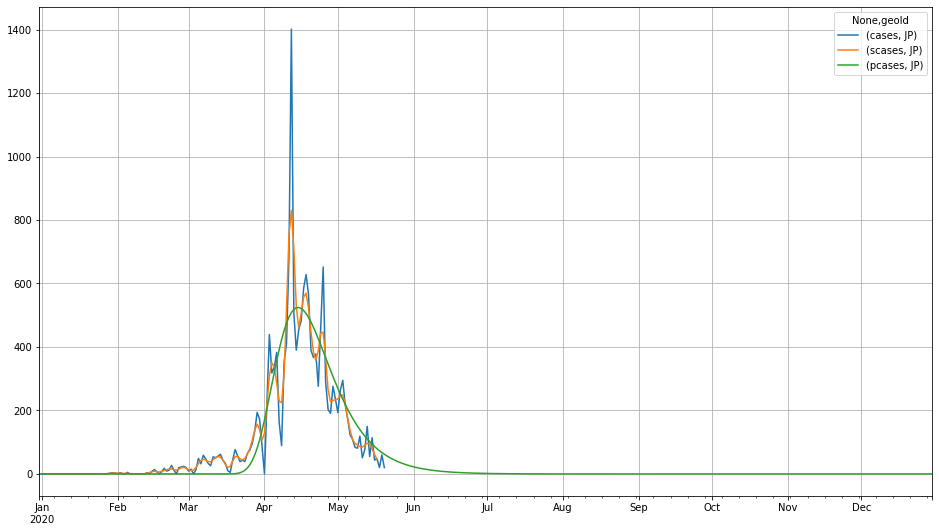

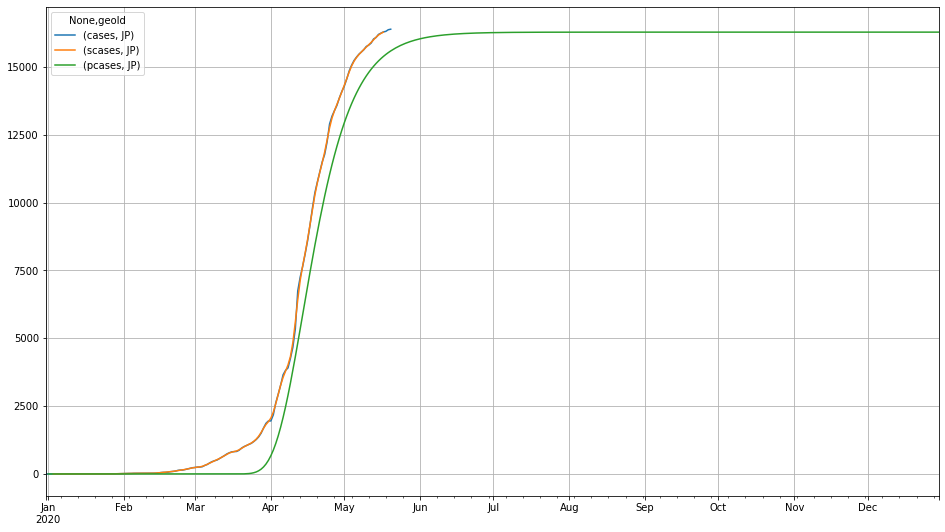

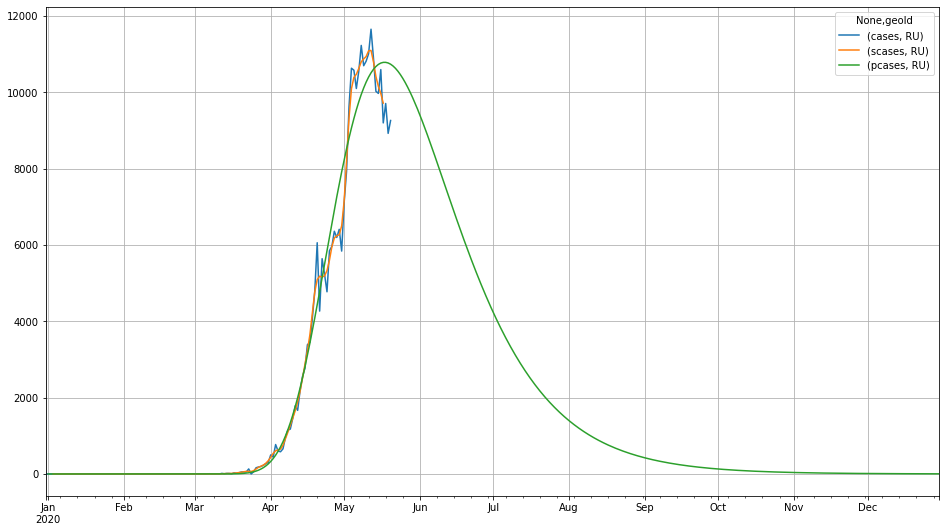

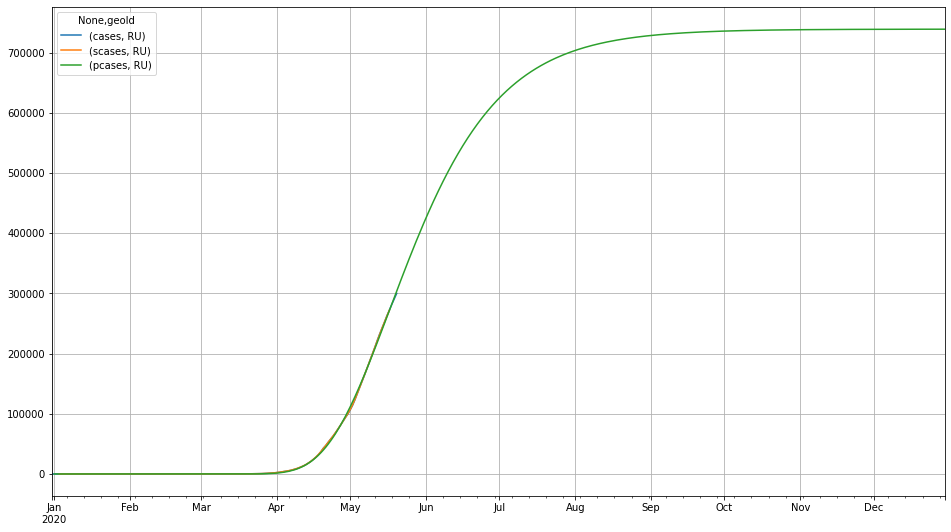

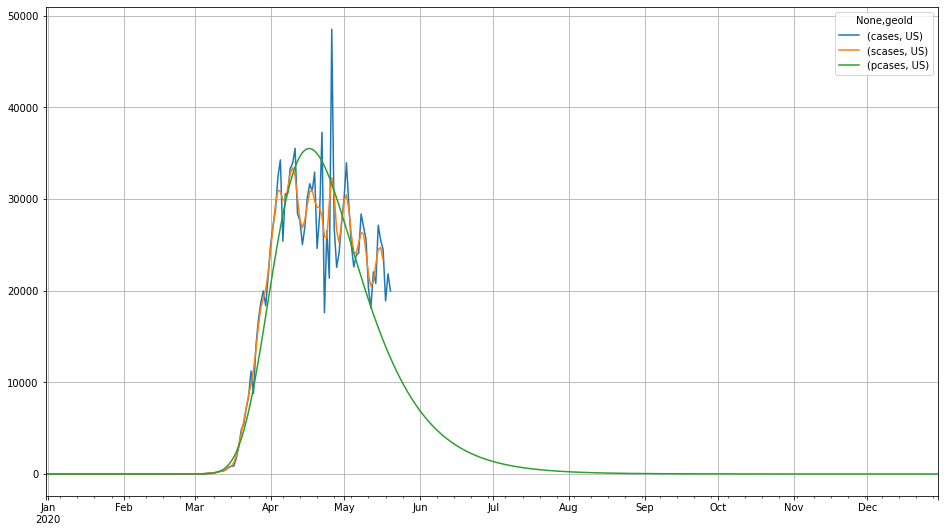

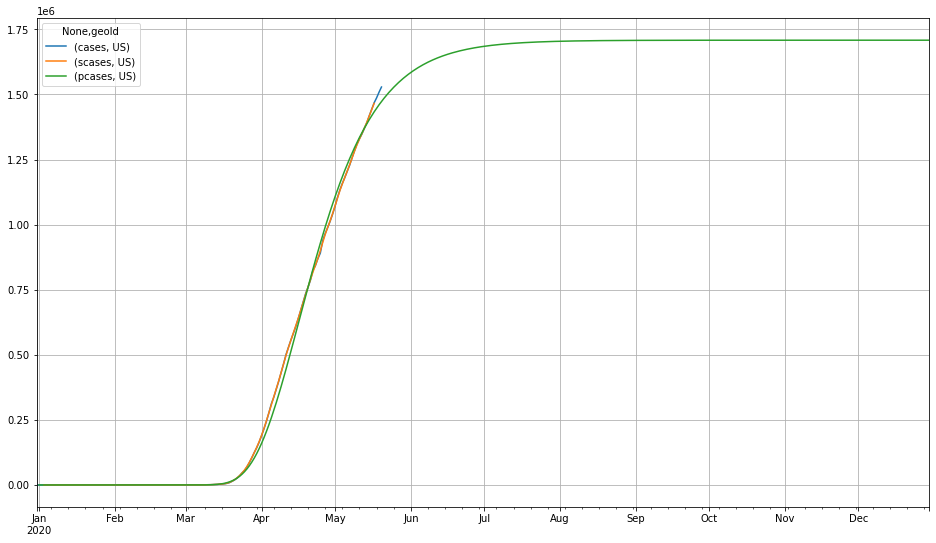

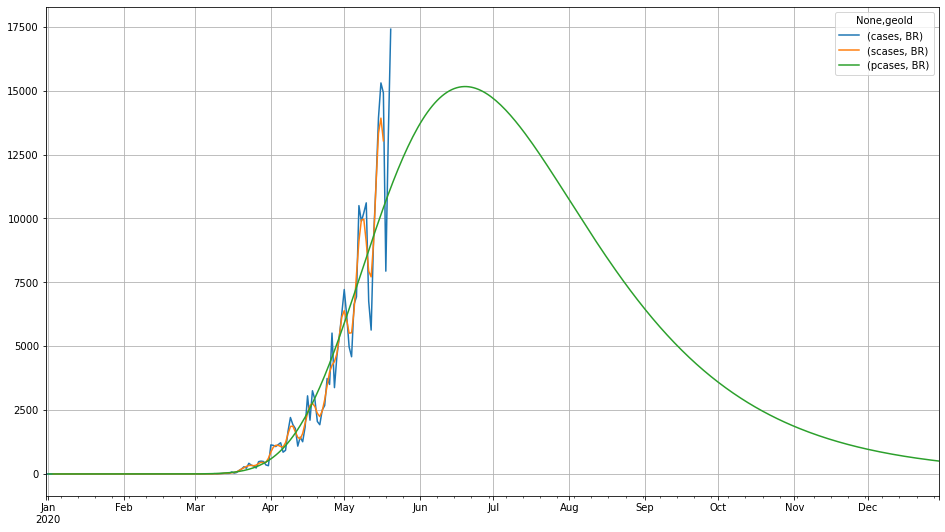

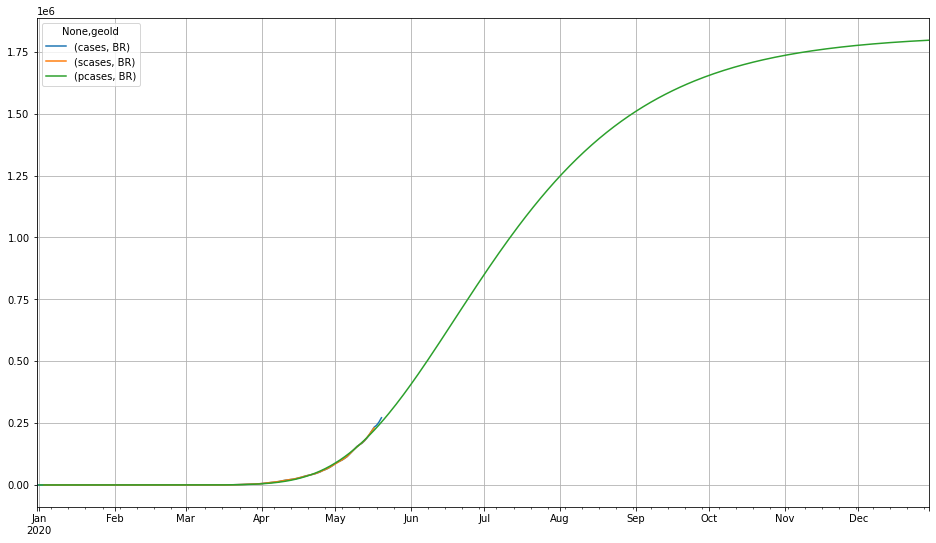

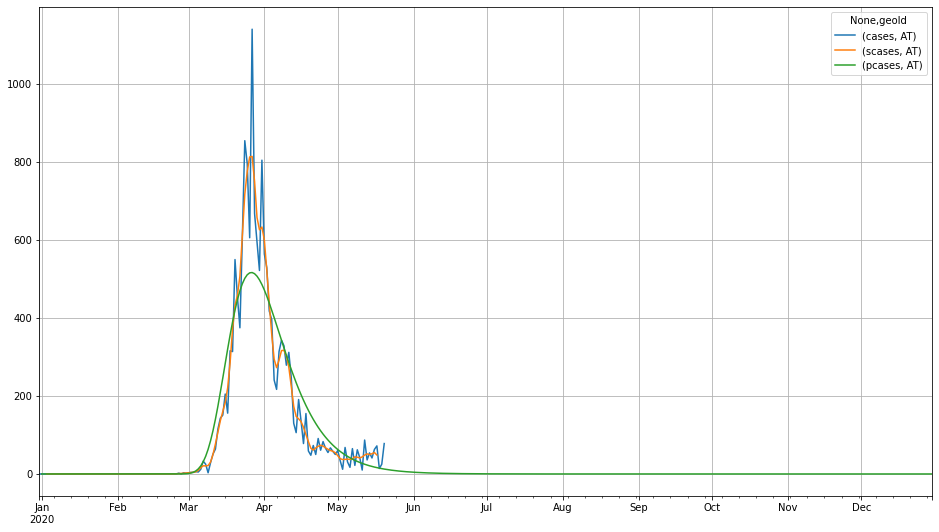

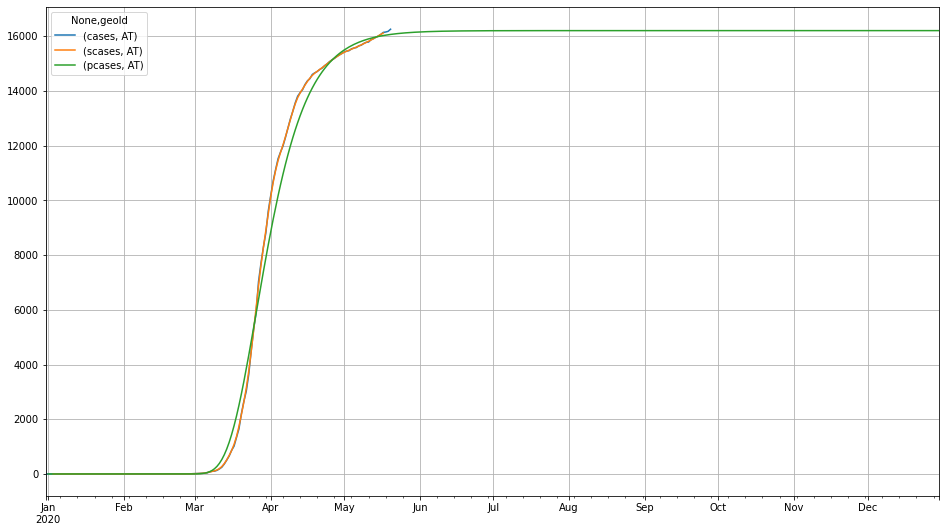

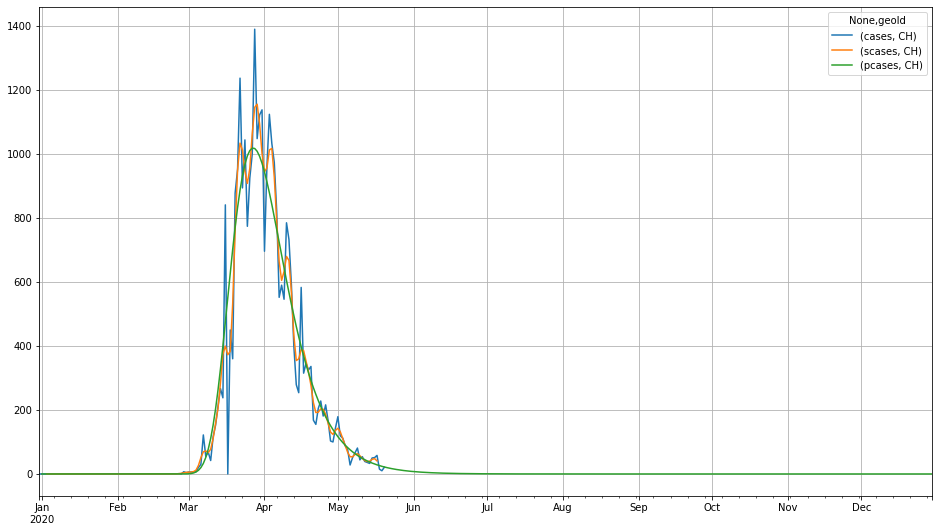

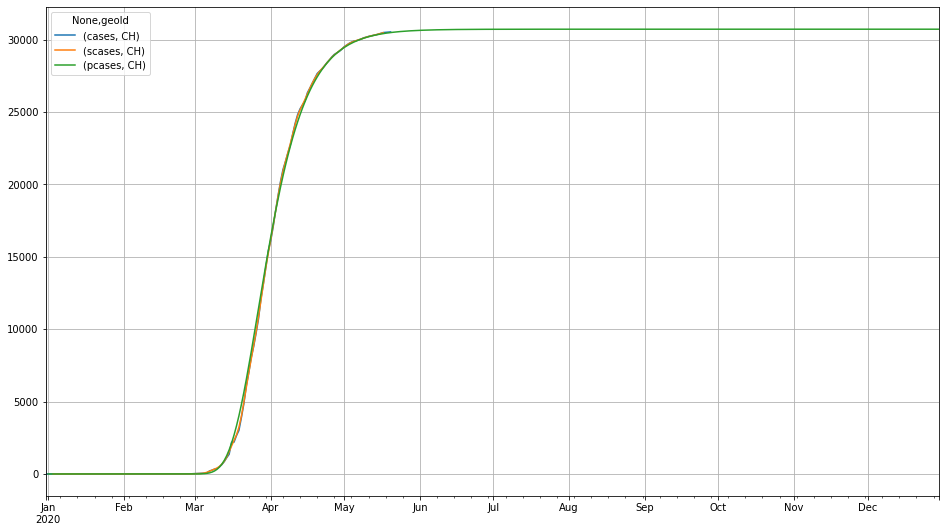

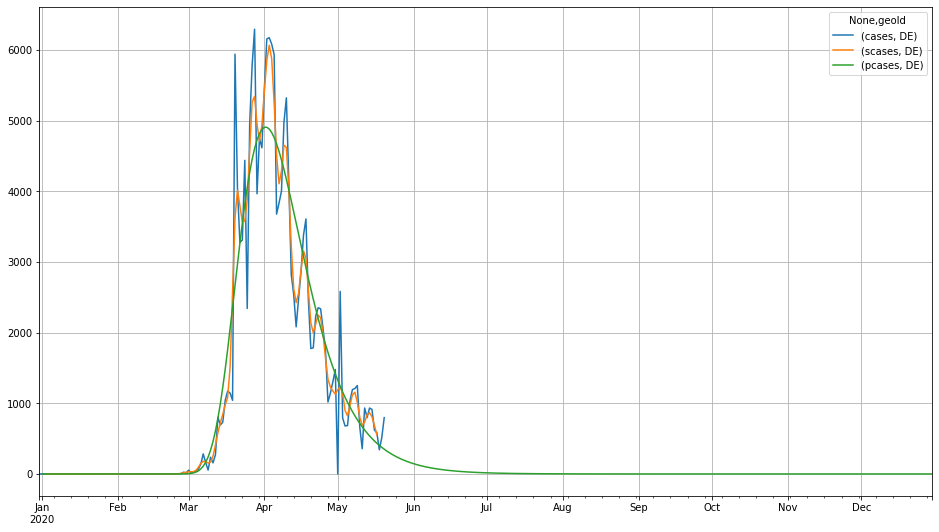

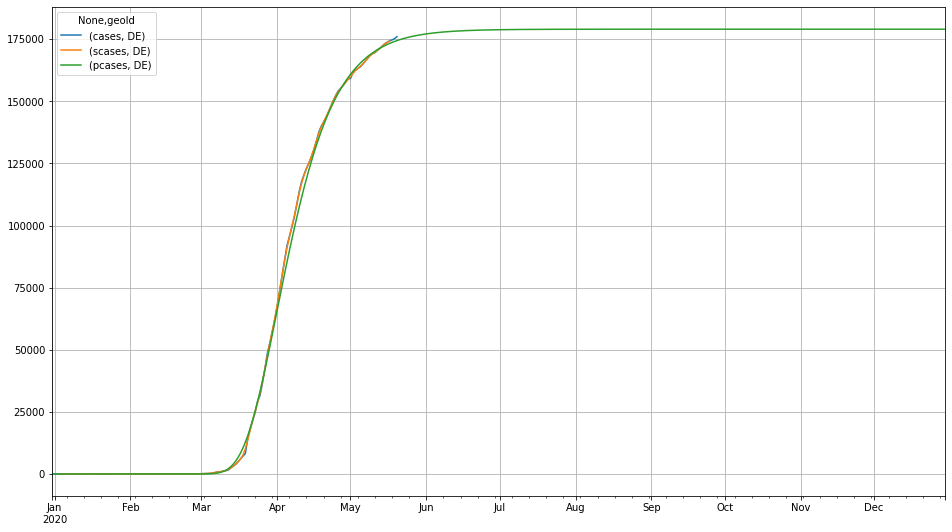

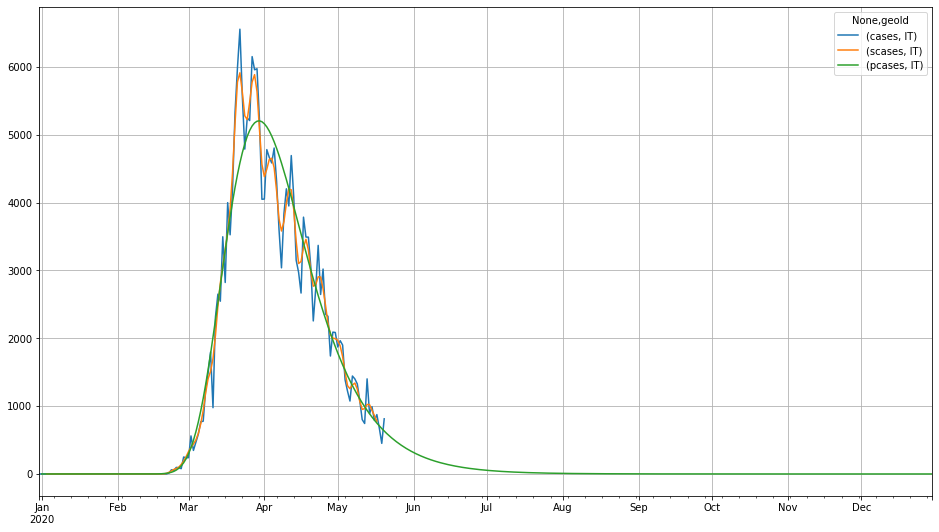

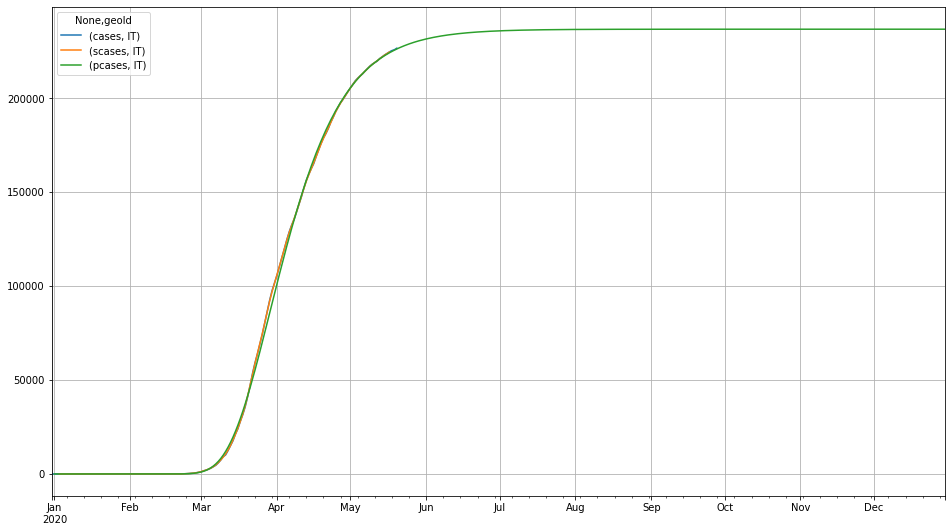

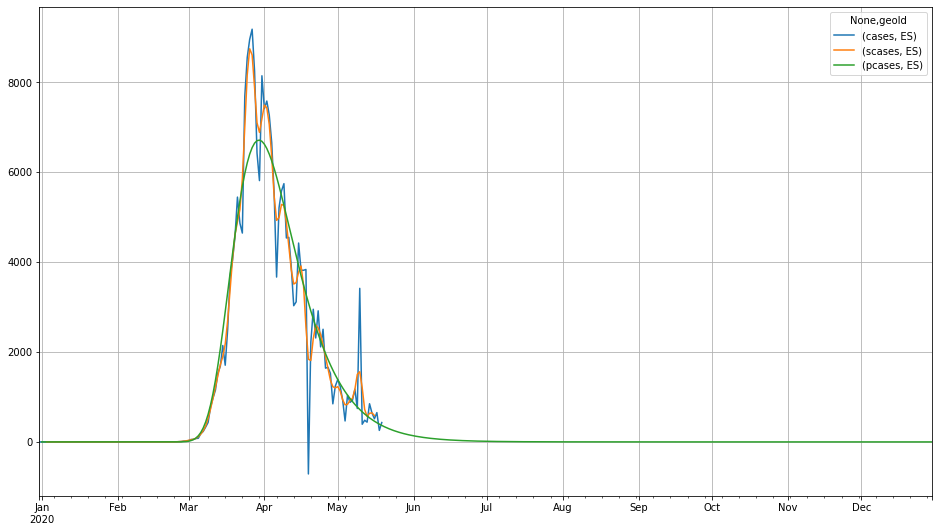

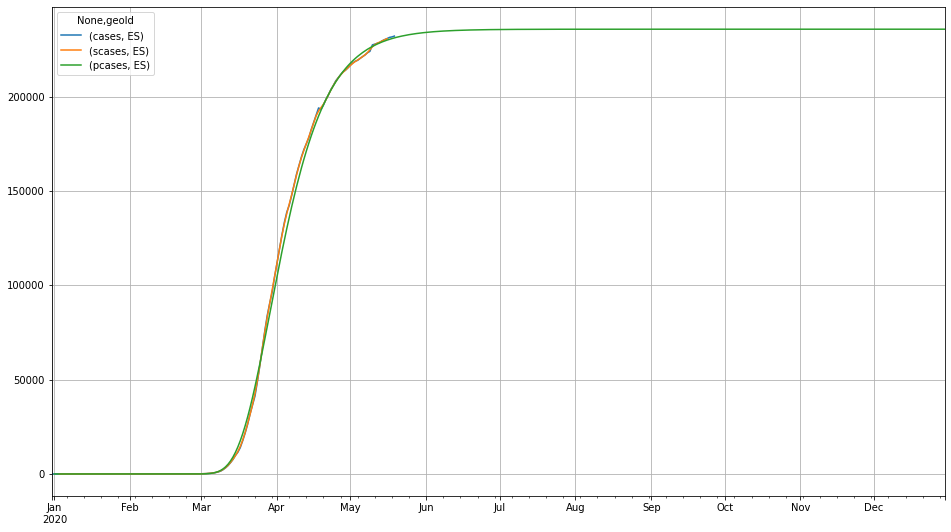

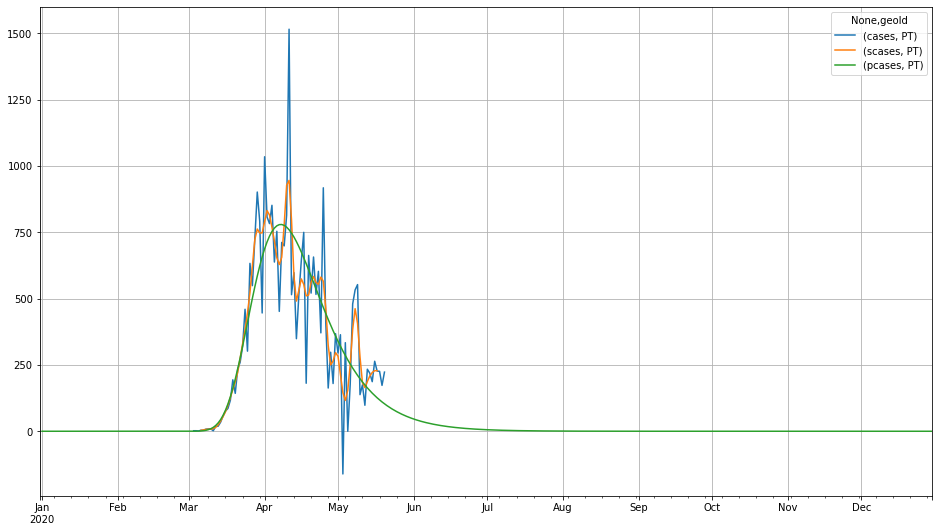

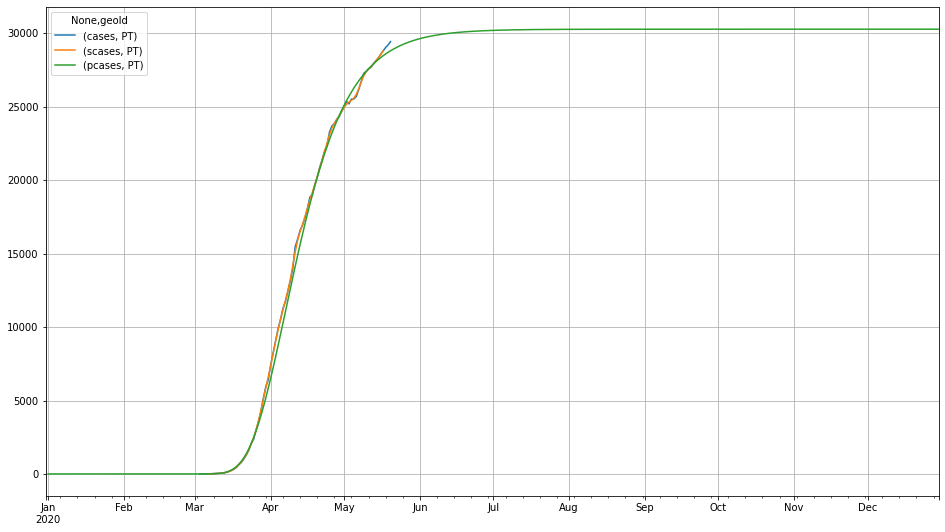

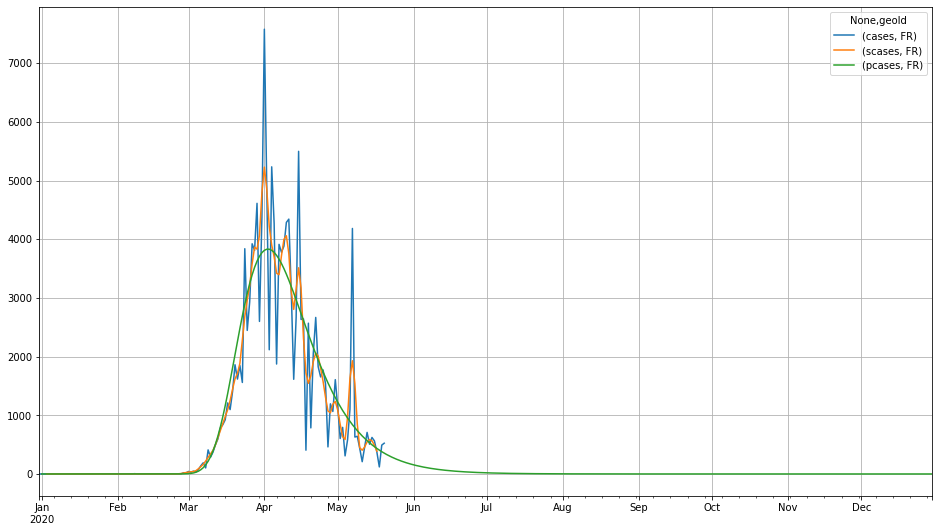

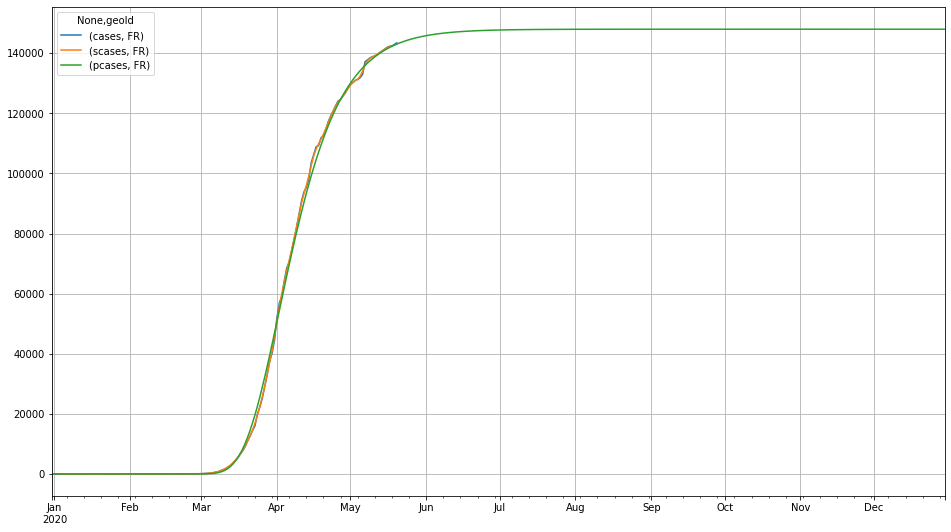

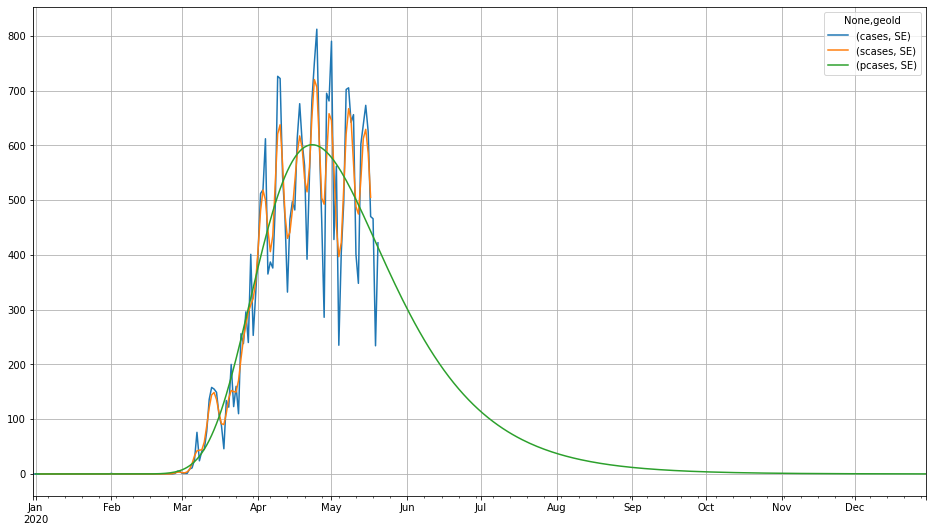

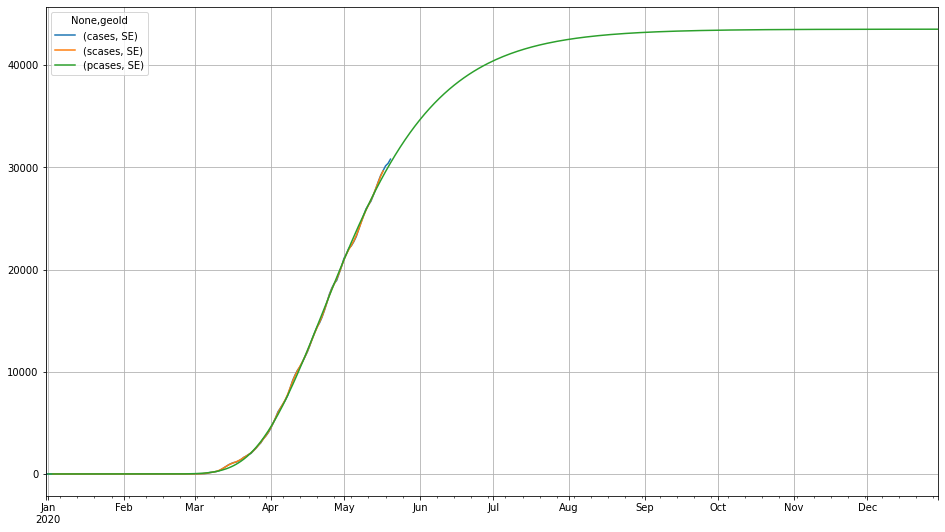

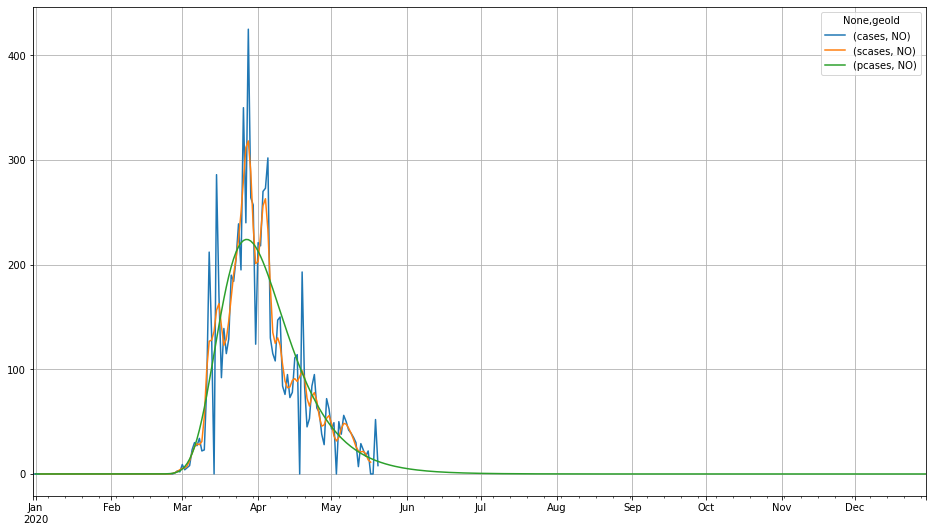

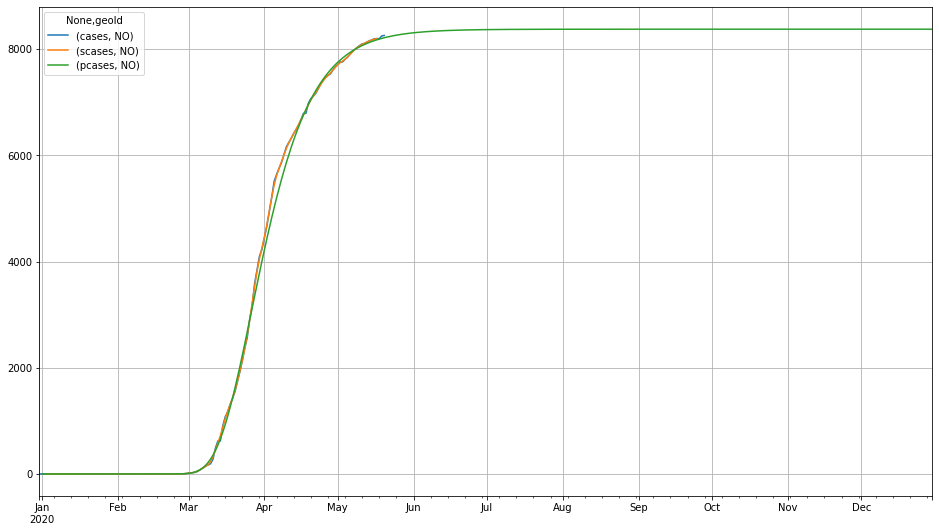

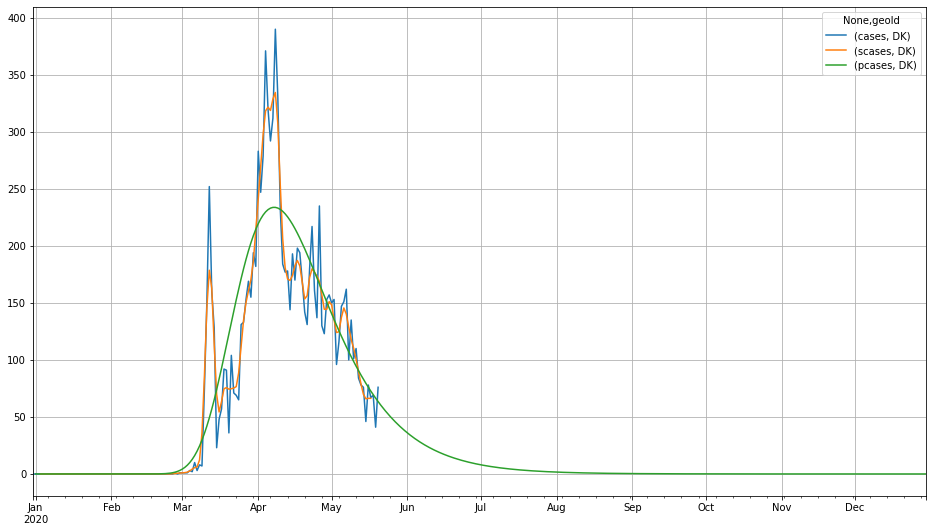

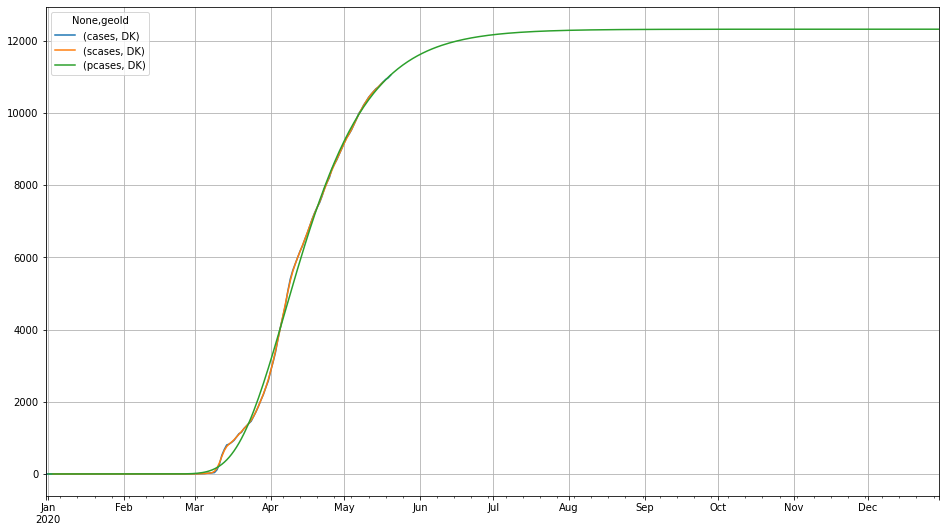

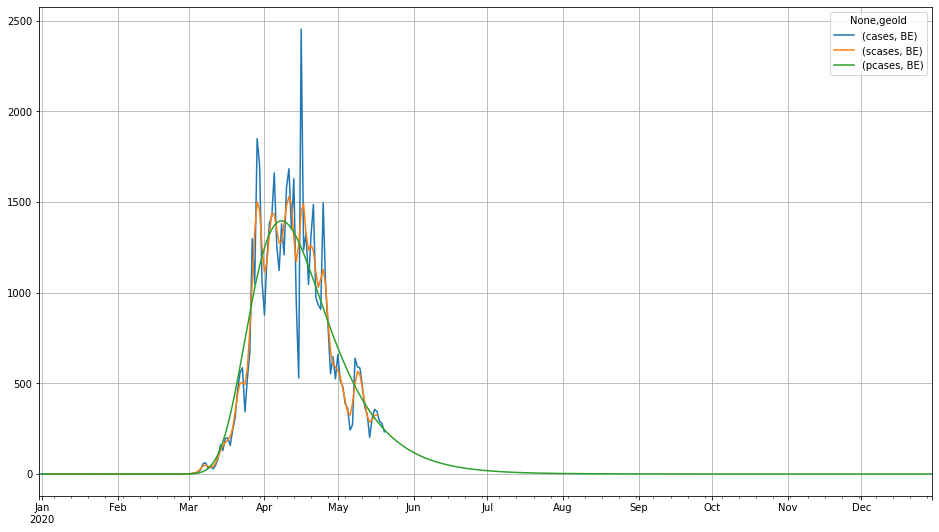

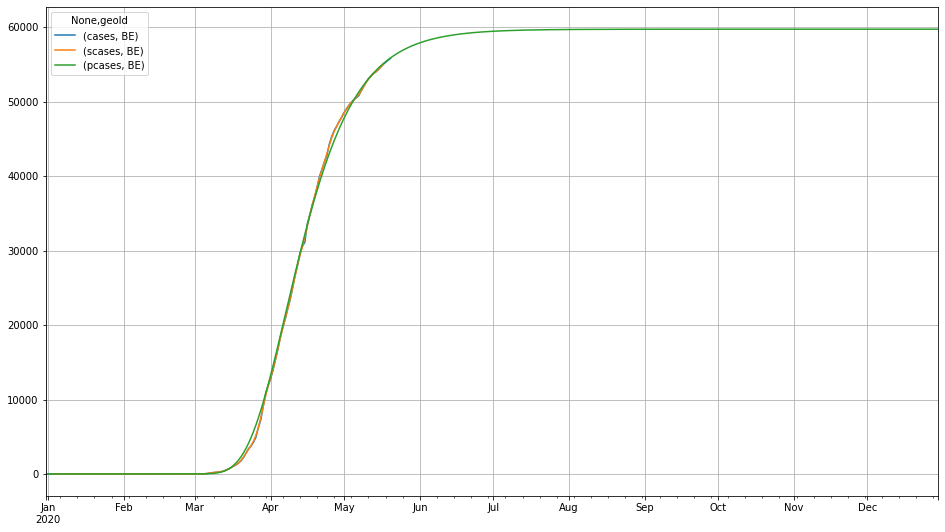

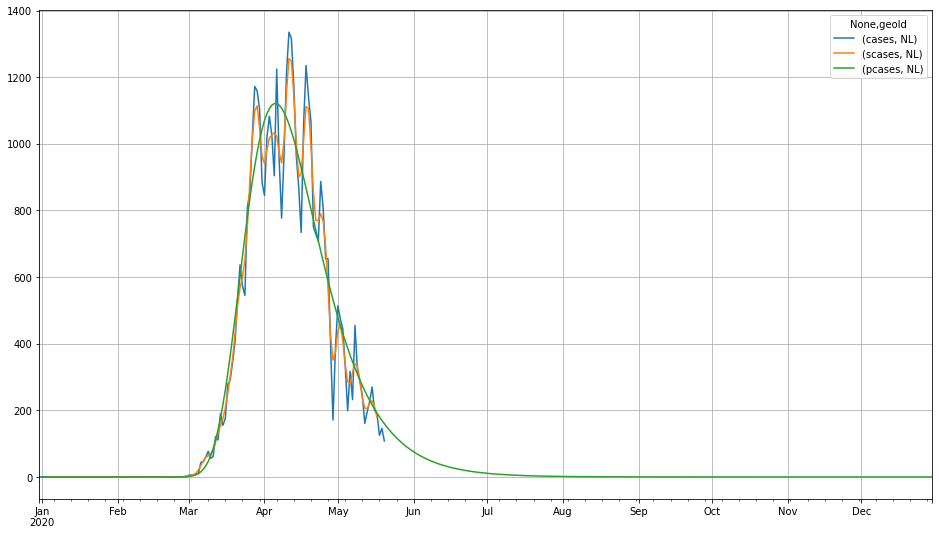

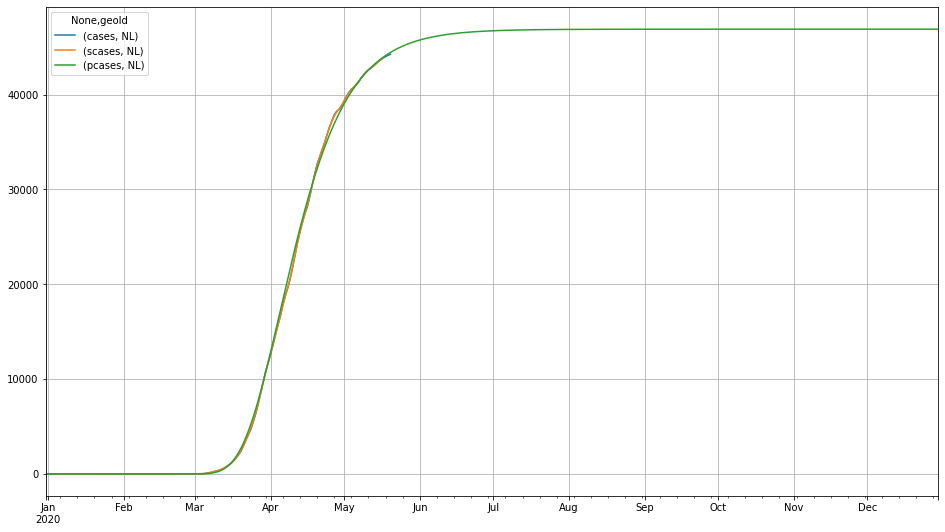

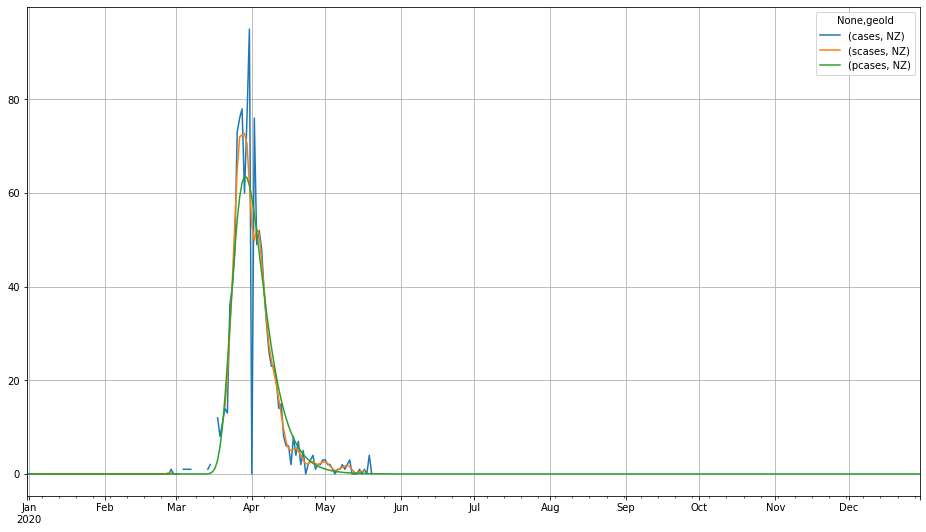

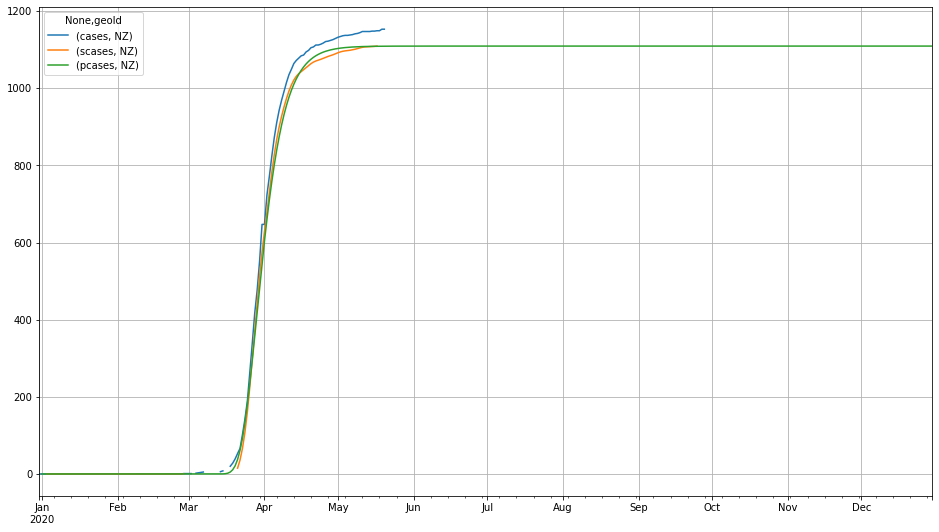

In [24]:
#countries = np.sort(df['geoId'].unique())
countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE', 'NO', 'DK', 'BE', 'NL', 'NZ']

measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

def fitres(progress):
    global df_pred, fit
    
    df_pred['scaled'] = df_pred['cumul'] / maxcases * progress
    df_pred = df_pred[df_pred['scaled'] < 1]
    
    if len(df_pred) > 4:
        df_pred['linear'] = - np.log(- np.log(df_pred['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        return(fit[1][0])
    else:
        return 99    

from scipy.optimize import minimize

for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(
        7, win_type='hann', center=True).mean()
    df_pred = pd.DataFrame(
        {'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
    
    popdata = df[df['geoId'] == country]['popData2018'].iloc[0]
    mincases = popdata / 1e6
    maxcases = df_pred[measure].cumsum().max()
    df_pred = df_pred[df_pred[measure] > mincases]
    
    if len(df_pred) > 0:
        df_pred['cumul'] = df_pred[measure].cumsum()
        
        optim = minimize(fitres, 1, method='SLSQP', bounds=[(0.1, 1)])
        progress = optim.x[0]
        
        df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(
            fit[0], df_geo['daynum']))) * maxcases / progress
        df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
        
        slope = fit[0][0]
        intercept = fit[0][1]
        beta = 1 / slope
        mu = - intercept * beta
        
        peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
        floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 5e5)) & (
            df_geo[(pmeasure, country)].index > peak)].index.min()
        
        print('{} Res {:6.3f} at {:3.0f}% of {:7.0f} peak {} floor {} beta {:6.3f} mu {:7.3f}'.format(
            country, optim.fun, progress * 100, df_geo[pmeasure][country].cumsum().max(), peak.date(), floor.date(), beta, mu))
        
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
            figsize=(16, 9), grid=True)
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
            figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.